In [1]:
print("Hell")

Hell


In [2]:
import matplotlib.pyplot as plt

In [49]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np

In [4]:
IMAGE_SIZE =256
BATCH_SIZE =32
EPOCHS = 10
CHANNELS =3

In [5]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
"Cherry",
shuffle = True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE)

Found 6338 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['Cherry Healthy', 'Cherry Powdery mildew']

In [7]:
len(dataset)

199

In [8]:
199*32

6368

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0]


In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[ 78.  74.  71.]
  [ 78.  74.  71.]
  [ 78.  74.  71.]
  ...
  [100.  96.  93.]
  [101.  97.  94.]
  [101.  97.  94.]]

 [[ 78.  74.  71.]
  [ 78.  74.  71.]
  [ 78.  74.  71.]
  ...
  [ 99.  95.  92.]
  [101.  97.  94.]
  [102.  98.  95.]]

 [[ 79.  75.  72.]
  [ 79.  75.  72.]
  [ 79.  75.  72.]
  ...
  [100.  96.  93.]
  [102.  98.  95.]
  [104. 100.  97.]]

 ...

 [[ 94.  89.  85.]
  [ 93.  88.  84.]
  [103.  98.  94.]
  ...
  [121. 116. 110.]
  [118. 113. 107.]
  [116. 111. 105.]]

 [[ 95.  90.  86.]
  [ 98.  93.  89.]
  [105. 100.  96.]
  ...
  [116. 111. 105.]
  [113. 108. 102.]
  [112. 107. 101.]]

 [[101.  96.  92.]
  [107. 102.  98.]
  [110. 105. 101.]
  ...
  [116. 111. 105.]
  [116. 111. 105.]
  [116. 111. 105.]]], shape=(256, 256, 3), dtype=float32)


In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[184. 165. 161.]
  [182. 163. 159.]
  [191. 172. 168.]
  ...
  [183. 164. 160.]
  [184. 165. 161.]
  [189. 170. 166.]]

 [[175. 156. 152.]
  [180. 161. 157.]
  [170. 151. 147.]
  ...
  [184. 165. 161.]
  [185. 166. 162.]
  [188. 169. 165.]]

 [[185. 166. 162.]
  [199. 180. 176.]
  [187. 168. 164.]
  ...
  [183. 164. 160.]
  [185. 166. 162.]
  [189. 170. 166.]]

 ...

 [[182. 162. 164.]
  [171. 151. 153.]
  [163. 143. 145.]
  ...
  [171. 151. 150.]
  [171. 151. 150.]
  [176. 156. 155.]]

 [[189. 169. 171.]
  [169. 149. 151.]
  [163. 143. 145.]
  ...
  [179. 159. 158.]
  [182. 162. 161.]
  [188. 168. 167.]]

 [[187. 167. 169.]
  [165. 145. 147.]
  [165. 145. 147.]
  ...
  [183. 163. 162.]
  [183. 163. 162.]
  [186. 166. 165.]]]


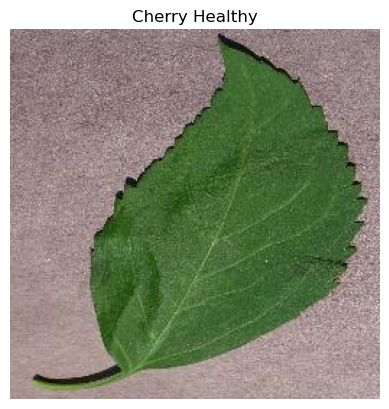

In [12]:
# Now visualizing the image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

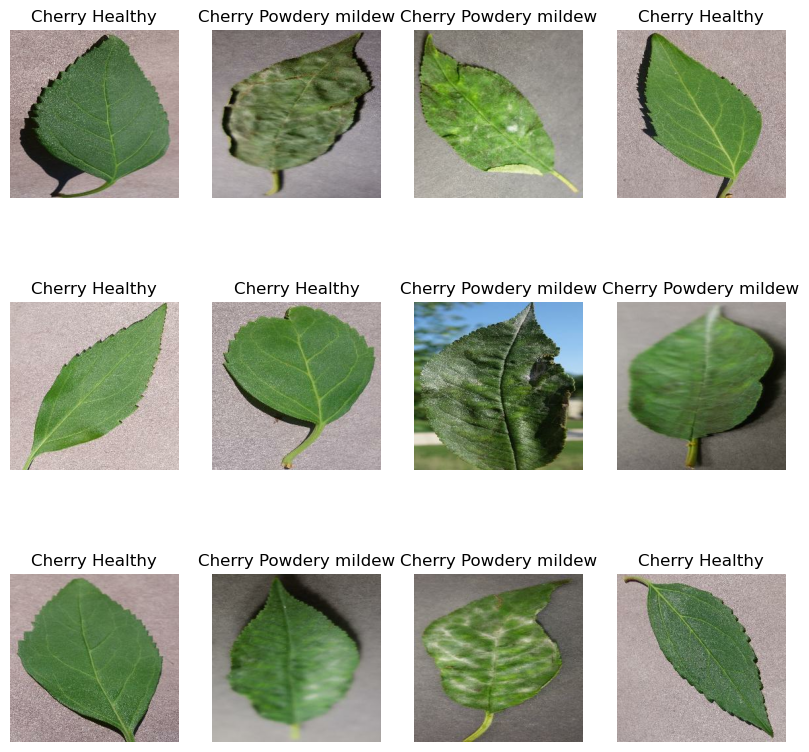

In [13]:
# Lets display someting more
plt.figure(figsize =(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
# 40% will go for the training process
train_size = 0.8
len(dataset)*train_size

159.20000000000002

In [15]:
train_ds = dataset.take(159)
len(train_ds)

159

In [16]:
test_ds = dataset.skip(159)
len(test_ds)

40

In [17]:
val_size = 0.1
len(dataset)*val_size

19.900000000000002

In [18]:
val_ds = test_ds.take(19)
len(val_ds)

19

In [19]:
test_ds = test_ds.skip(19)
len(test_ds)

21

In [20]:
#for increasing the performance
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [21]:
#Some data augmentation
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape= input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose= 1,
    validation_data = val_ds
)

Epoch 1/10
159/159 [==============================] - 331s 2s/step - loss: 0.2878 - accuracy: 0.8821 - val_loss: 0.1197 - val_accuracy: 0.9622
Epoch 2/10
159/159 [==============================] - 326s 2s/step - loss: 0.1286 - accuracy: 0.9664 - val_loss: 0.0725 - val_accuracy: 0.9868
Epoch 3/10
159/159 [==============================] - 317s 2s/step - loss: 0.0885 - accuracy: 0.9805 - val_loss: 0.0849 - val_accuracy: 0.9819
Epoch 4/10
159/159 [==============================] - 315s 2s/step - loss: 0.0700 - accuracy: 0.9866 - val_loss: 0.0967 - val_accuracy: 0.9836
Epoch 5/10
159/159 [==============================] - 309s 2s/step - loss: 0.0617 - accuracy: 0.9860 - val_loss: 0.0688 - val_accuracy: 0.9836
Epoch 6/10
159/159 [==============================] - 316s 2s/step - loss: 0.0412 - accuracy: 0.9894 - val_loss: 0.0538 - val_accuracy: 0.9885
Epoch 7/10
159/159 [==============================] - 310s 2s/step - loss: 0.0361 - accuracy: 0.9912 - val_loss: 0.0543 - val_accuracy: 0.9885

In [27]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 14s 409ms/step - loss: 0.0116 - accuracy: 0.9969


In [28]:
history

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']

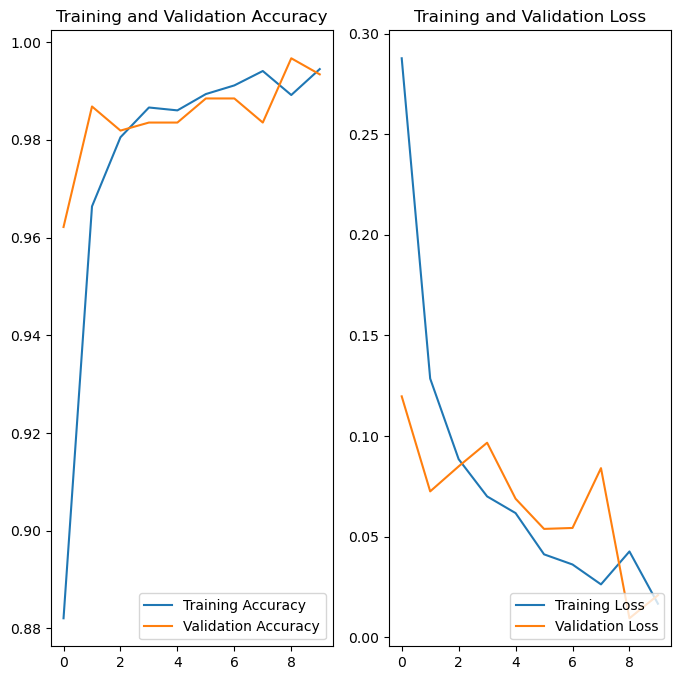

In [40]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc ='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round (100*(np.max(predictions[0])),2)
    return predicted_class , confidence

1/1 [==============================] - 0s 31ms/step


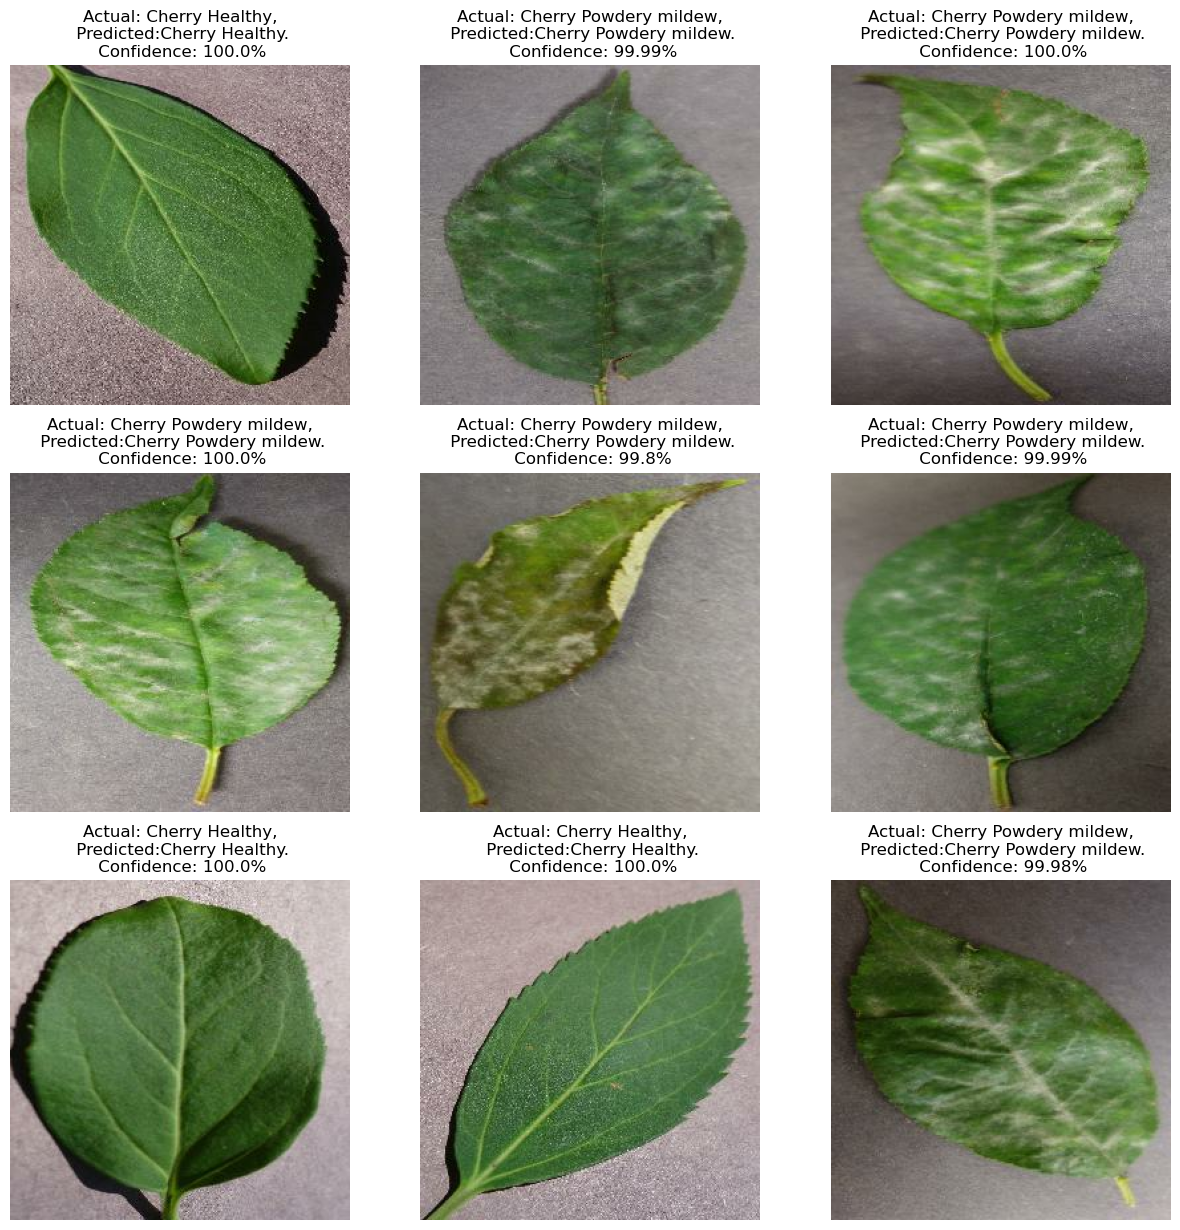

In [54]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")